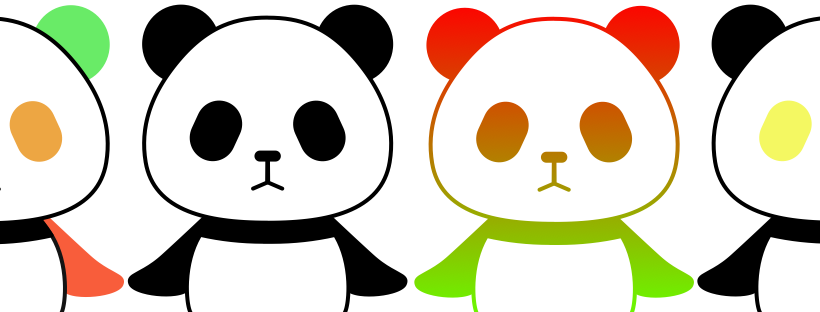

At the end of your data analysis, you need to think about the most effective way to communicate your insights. In some cases, using a table instead of a plot can be more suitable to tell your story. However, just because you are using a table does not mean you cannot guide your audience's attention to the most important message with the help of visual aids. For this purpose, the pandas library provides the style attribute to add formatting and styling to your DataFrames.

In this tutorial, you will learn how to **style your DataFrame to effectively communicate your insights**. You will learn everything from setting up some global display options to writing custom styling functions. 

For this tutorial, we will be using a fictional dataset.

Let’s begin by loading the fictional dataset:

In [1]:
import pandas as pd

df = pd.read_csv("../input/sample-dataset-for-dataframe-styling/sample_dataset.csv")

df

,A,B,C,D
0,3000,8,2.324234,0.10
1,2500,-1,0.892340,-0.99
2,1200,3,1.239841,-0.23
3,4000,-4,3.923840,0.75
4,1000,-10,0.923840,0.50
5,10000,5,NaN,-0.50


# Global Display Options
Before you get started with customizing the visualizations for individual DataFrames, you can adjust the global display behavior of pandas [1]. Two common tasks you can handle are displaying all columns of a DataFrame and adjusting the width of a DataFrame column.

When your DataFrame has too many columns, pandas does not render all columns but instead omits columns in the middle. To force pandas to **display all columns**, you can set:

In [2]:
pd.set_option("display.max_columns", None)

When you are working with long texts pandas truncates the text in the column. To force pandas to **display the column contents by increasing the column width**, you can set:

In [3]:
pd.set_option('display.max_colwidth', None)

# General Tips
The following tips apply to all methods of the styler object.

## Multiple Stylings
You can combine multiple stylings by chaining multiple functions together.

E.g. `df.style.set_caption(...).format(...).bar(...).set_properties(...)`

## Column-wise vs. Row-wise Styling
By default, the styling is applied column-wise (`axis = 0`). 
If you want to apply the styling row-wise, use `axis = 1` in the properties instead.

E.g. `df.style.highlight_min(axis = 1)`

In [4]:
display(df.style.set_caption("Highlight column-wise maximum with 'axis = 0'").highlight_max(axis = 0))

display(df.style.set_caption("Highlight row-wise maximum with 'axis = 1'").highlight_max(axis = 1))

,A,B,C,D
0,3000,8,2.324234,0.100000
1,2500,-1,0.892340,-0.990000
2,1200,3,1.239841,-0.230000
3,4000,-4,3.923840,0.750000
4,1000,-10,0.923840,0.500000
5,10000,5,nan,-0.500000


,A,B,C,D
0,3000,8,2.324234,0.100000
1,2500,-1,0.892340,-0.990000
2,1200,3,1.239841,-0.230000
3,4000,-4,3.923840,0.750000
4,1000,-10,0.923840,0.500000
5,10000,5,nan,-0.500000


## Styling Only a Subset
By default, the styling methods are applied to all columns.
If you want to apply the stylings only to one column or a selected subset of columns, use the `subset` parameter as follows:

E.g. `df.style.text_gradient(subset = ["A", "D"])`

In [5]:
display(df.style.set_caption("Background gradient applied to all columns").background_gradient())

display(df.style.set_caption("Background gradient applied to columns A and D").background_gradient(subset = ["A", "D"]))

,A,B,C,D
0,3000,8,2.324234,0.100000
1,2500,-1,0.892340,-0.990000
2,1200,3,1.239841,-0.230000
3,4000,-4,3.923840,0.750000
4,1000,-10,0.923840,0.500000
5,10000,5,nan,-0.500000


,A,B,C,D
0,3000,8,2.324234,0.100000
1,2500,-1,0.892340,-0.990000
2,1200,3,1.239841,-0.230000
3,4000,-4,3.923840,0.750000
4,1000,-10,0.923840,0.500000
5,10000,5,nan,-0.500000


# Formatting

Before we begin with any specific coloring, let’s have a look at some fundamental formatting techniques to make your DataFrame look more polished.

## Caption
Adding captions to a table is almost always required. 
You can add the caption to the DataFrame with this method.

In [6]:
df.style.set_caption("Caption Text")

,A,B,C,D
0,3000,8,2.324234,0.100000
1,2500,-1,0.892340,-0.990000
2,1200,3,1.239841,-0.230000
3,4000,-4,3.923840,0.750000
4,1000,-10,0.923840,0.500000
5,10000,5,nan,-0.500000


## Renaming Columns
Sometimes, the column names are variable names or abbreviated and therefore not intuitive for the audience. 
Similarly to adding meaningful axis labels to a plot, renaming the column names to a more intuitive version can be helpful for your audience. 

If you need to work with the DataFrame later on, it might make sense to create a copy of the DataFrame for visualization purposes only. 

There are two options to rename your columns:

A. You can rename all columns at once:

In [7]:
#Create a copy of the DataFrame for visualization purposes
df_viz = df.copy()

# Rename all columns
df_viz.columns = ["New Column Name A", "New Column Name  B", "New Column Name  C", "New Column Name  D"]

df_viz

,New Column Name A,New Column Name B,New Column Name C,New Column Name D
0,3000,8,2.324234,0.10
1,2500,-1,0.892340,-0.99
2,1200,3,1.239841,-0.23
3,4000,-4,3.923840,0.75
4,1000,-10,0.923840,0.50
5,10000,5,NaN,-0.50


B. Or you can rename only a subset of columns:

In [8]:
#Create a copy of the DataFrame for visualization purposes
df_viz = df.copy()

# Rename selection of columns
df_viz.rename(columns = {"A": "New Column Name A", "B": "New Column Name B"}, inplace=True)

df_viz

,New Column Name A,New Column Name B,C,D
0,3000,8,2.324234,0.10
1,2500,-1,0.892340,-0.99
2,1200,3,1.239841,-0.23
3,4000,-4,3.923840,0.75
4,1000,-10,0.923840,0.50
5,10000,5,NaN,-0.50


## Hiding the Index
You can hide the index with the following method if it does not add any value.

In [9]:
df.style.hide_index()

A,B,C,D
3000,8,2.324234,0.100000
2500,-1,0.892340,-0.990000
1200,3,1.239841,-0.230000
4000,-4,3.923840,0.750000
1000,-10,0.923840,0.500000
10000,5,nan,-0.500000


## Format Columns
**Adding thousands-separators or truncating the floating-point numbers** to fewer decimal places can increase the readability of your DataFrame. 
For this purpose, the Styler object can distinguish the display values from the actual values.
By using the `.format()` method you can manipulate the display values according to a format spec string [3].

You could even add a unit before or after the number as part of the formatting. 
However, to not disturb the attention, I would recommend putting the unit in square brackets in the column name (see "Renaming columns"). 
For example, "Salary [$]".

In [10]:
df.style.format({"A" : "{:,.0f}",
                 "B" : "{:d} $",
                 "C" : "{:.3f}",
                 "D" : "{:.2f}"})

,A,B,C,D
0,"3,000",8 $,2.324,0.10
1,"2,500",-1 $,0.892,-0.99
2,"1,200",3 $,1.240,-0.23
3,"4,000",-4 $,3.924,0.75
4,"1,000",-10 $,0.924,0.50
5,"10,000",5 $,nan,-0.50


# Styling Properties
Sometimes, all you want to do might be to **highlight a single column** of the DataFrame by adjusting the background and font color. 
For this purpose, you can use the `.set_properties()` method to adjust some CSS properties of a DataFrame such as colors, fonts, borders, etc.

In [11]:
df.style.set_properties(**{"background-color": "lightblue",  
                           "color" : "white",
                           "border" : "0.5px solid white"})

,A,B,C,D
0,3000,8,2.324234,0.100000
1,2500,-1,0.892340,-0.990000
2,1200,3,1.239841,-0.230000
3,4000,-4,3.923840,0.750000
4,1000,-10,0.923840,0.500000
5,10000,5,nan,-0.500000


# Built-in Styling
The Style class has some built-in methods for common styling tasks.

## Highlighting

Highlighting individual cells is an easy way to guide your audience’s attention to what you want to show. 
Common values you might want to highlight are minimum, maximum, and null values. 
For these cases, you can use the respective built-in methods.

You can adjust the highlight color with the parameter `color` for minimum and maximum highlighting and `nullcolor` for null highlighting. 



In [12]:
df.style.highlight_null(null_color = "yellow")

,A,B,C,D
0,3000,8,2.324234,0.100000
1,2500,-1,0.892340,-0.990000
2,1200,3,1.239841,-0.230000
3,4000,-4,3.923840,0.750000
4,1000,-10,0.923840,0.500000
5,10000,5,nan,-0.500000


If you want to highlight both minimum and maximum values, you can do so by chaining both functions together.

In [13]:
df.style.highlight_min(color = "red").highlight_max(color = "green")

,A,B,C,D
0,3000,8,2.324234,0.100000
1,2500,-1,0.892340,-0.990000
2,1200,3,1.239841,-0.230000
3,4000,-4,3.923840,0.750000
4,1000,-10,0.923840,0.500000
5,10000,5,nan,-0.500000


## Gradients

Adding gradient styles can help the audience understand the relationship of the numerical values within a column or a row.
For example, gradients can indicate whether a value is large or small, positive or negative, or even good or bad.

There are also two techniques to add gradients to the DataFrame:

A. You can apply gradient styles either to the text [2]

In [14]:
df.style.text_gradient(subset = ["D"], 
                       cmap = "RdYlGn", 
                       vmin = -1, 
                       vmax = 1)

,A,B,C,D
0,3000,8,2.324234,0.100000
1,2500,-1,0.892340,-0.990000
2,1200,3,1.239841,-0.230000
3,4000,-4,3.923840,0.750000
4,1000,-10,0.923840,0.500000
5,10000,5,nan,-0.500000


B. You can apply gradient styles either to the background [2].

In [15]:
df.style.background_gradient(subset = ["D"], 
                             cmap = "RdYlGn", 
                             vmin = -1, 
                             vmax = 1)

,A,B,C,D
0,3000,8,2.324234,0.100000
1,2500,-1,0.892340,-0.990000
2,1200,3,1.239841,-0.230000
3,4000,-4,3.923840,0.750000
4,1000,-10,0.923840,0.500000
5,10000,5,nan,-0.500000


With the `cmap` parameter and `vmin` and `vmax` you can set the properties of the gradient.

## Bars

Another way of visualizing the relationship and order within a column or a row is to draw bars in the cell’s background [2].

Again, there are two essential techniques to utilize bars in your DataFrames:

A. The straightforward application is to use a standard uni-colored bar:

In [16]:
df.style.bar(subset = ["A"], color = "lightblue", vmin = 0)

,A,B,C,D
0,3000,8,2.324234,0.100000
1,2500,-1,0.892340,-0.990000
2,1200,3,1.239841,-0.230000
3,4000,-4,3.923840,0.750000
4,1000,-10,0.923840,0.500000
5,10000,5,nan,-0.500000


B. You can also create bi-colored bar charts by setting a `mid` value and colors for the negative and positive values. When using this method, I recommend combining it with some borders to make it clearer.

In [17]:
df.style.bar(subset = ["D"], 
             align = "mid", 
             color = ["salmon", "lightgreen"])\
         .set_properties(**{'border': '0.5px solid black'})

,A,B,C,D
0,3000,8,2.324234,0.100000
1,2500,-1,0.892340,-0.990000
2,1200,3,1.239841,-0.230000
3,4000,-4,3.923840,0.750000
4,1000,-10,0.923840,0.500000
5,10000,5,nan,-0.500000


# Custom Styling

If the built-in styling methods are not sufficient for your needs, you can write your own styling function and apply it to the DataFrame. 
You can either apply styling element-wise with the `.applymap()` method or column- or row-wise with the `.apply()` method [2].

A popular example of this is to display negative values of a DataFrame in red color as shown below.

In [18]:
def custom_styling(val):
    color = "red" if val < 0 else "black"
    return f"color: {color}"

df.style.applymap(custom_styling)

,A,B,C,D
0,3000,8,2.324234,0.100000
1,2500,-1,0.892340,-0.990000
2,1200,3,1.239841,-0.230000
3,4000,-4,3.923840,0.750000
4,1000,-10,0.923840,0.500000
5,10000,5,nan,-0.500000


# Export to Excel

If you need your styled DataFrame in Excel format, you can export the DataFrame including the styling to an .xlsx file. 
For this, you need to have the openpyxl package installed.

In [19]:
pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 kB 1.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [20]:
df.style.background_gradient(subset = ["D"], 
                             cmap = "RdYlGn", 
                             vmin = -1, 
                             vmax = 1)\
         .to_excel("styled.xlsx", engine='openpyxl')

# Conclusion

The pandas DataFrame's `style` attribute enables you to format and style a DataFrame to effectively communicate the insights from your data analysis
In this tutorial, you learned the essential techniques to style pandas DataFrames including how to set global display options, format and customize stylings, and even how to export your DataFrame to Excel format.
There are many more styling and formatting options available on the pandas documentation.

Below I have summarized all tips in a cheat sheet:
TODO

# References
[1] “pandas 1.4.2 documentation”, “Options and settings.” pandas.pydata.org. [https://pandas.pydata.org/docs/user_guide/options.html](https://pandas.pydata.org/docs/user_guide/options.html) (accessed June 13, 2022)

[2] “pandas 1.4.2 documentation”, “Style.” pandas.pydata.org. https://pandas.pydata.org/docs/reference/style.html (accessed June 16, 2022)

[3] “pandas 1.4.2 documentation”, “Table Visualization.” pandas.pydata.org. https://pandas.pydata.org/docs/user_guide/style.html (accessed June 16, 2022)

[4] “Python", "string — Common string operations.” python.org. https://docs.python.org/3/library/string.html#formatspec (accessed June 13, 2022)